# Capstone: Analyzing World Data to Determine Problem Areas for Effective Altruism Initiatives and See Which Cities Offer High Impact Jobs


Effective altruism is a philosophy and social movement that uses evidence and reasoning to determine the most effective ways to benefit others. Effective altruism (EA) encourages individuals to consider all causes and actions and to act in the way that brings about the greatest positive impact, based upon their values.

In my capstone project, I have chosen to: 

1) look at the World Development Indicators Database to see which areas need more attention of the EA community, not just organizations but individuals willing to contribute to solving some of these challenges either through donations or working in NGOs in those areas.

2) scrape the High impact job board created by 80,000 Hours Initiative, geocode the data and visualize it to see where high impact jobs are available. For this I use Selenium (which I run locally via Anaconda Spyder). 

In [1]:
import folium
import pandas as pd
from IPython.display import HTML
import requests
from pandas.io.json import json_normalize
import numpy as np
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
## Country coordinates for plotting
country_geo = 'world-countries.json'

In [3]:
# Read in the World Development Indicators Database
data = pd.read_csv('Indicators.csv')
data.shape

(5656458, 6)

In [4]:
data.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


In [5]:
indicators = data.IndicatorName.unique()
indicators = indicators.tolist()
indicators

['Adolescent fertility rate (births per 1,000 women ages 15-19)',
 'Age dependency ratio (% of working-age population)',
 'Age dependency ratio, old (% of working-age population)',
 'Age dependency ratio, young (% of working-age population)',
 'Arms exports (SIPRI trend indicator values)',
 'Arms imports (SIPRI trend indicator values)',
 'Birth rate, crude (per 1,000 people)',
 'CO2 emissions (kt)',
 'CO2 emissions (metric tons per capita)',
 'CO2 emissions from gaseous fuel consumption (% of total)',
 'CO2 emissions from liquid fuel consumption (% of total)',
 'CO2 emissions from liquid fuel consumption (kt)',
 'CO2 emissions from solid fuel consumption (% of total)',
 'Death rate, crude (per 1,000 people)',
 'Fertility rate, total (births per woman)',
 'Fixed telephone subscriptions',
 'Fixed telephone subscriptions (per 100 people)',
 'Hospital beds (per 1,000 people)',
 'International migrant stock (% of population)',
 'International migrant stock, total',
 'Life expectancy at birt

To work with the data, let's create 

1) a function to select and plot the data

2) a function to visualize the data on a choropleth map.

In [6]:
def selectAndPlot(df, hist_indicator, hist_year):
    mask1 = df['IndicatorName'].str.contains(hist_indicator) 
    mask2 = df['Year'].isin([hist_year])

    # apply our mask
    stage = df[mask1 & mask2]
    data_to_plot = stage[['CountryCode','Value']]
    return stage, data_to_plot

def visualize():
    hist_indicator = stage.iloc[0]['IndicatorName']
    country_geo = 'world-countries.json'
    map = folium.Map(location=[100, 0], zoom_start=1.5)
    map.choropleth(geo_data=country_geo, data=data_to_plot,
                 columns=['CountryCode', 'Value'],
                 key_on='feature.id',
                 fill_color='YlGnBu', fill_opacity=0.7, line_opacity=0.2,
                 legend_name=hist_indicator)    
    map.save('plot_data.html')
           
    return HTML('<iframe src=plot_data.html width=700 height=450></iframe>')
    

In [56]:
#Let's look at the population growth
stage, data_to_plot = selectAndPlot(data, 'Urban population growth', 2014)
stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5534555,Arab World,ARB,Urban population growth (annual %),SP.URB.GROW,2014,2.645228
5534793,Caribbean small states,CSS,Urban population growth (annual %),SP.URB.GROW,2014,0.730358
5535154,Central Europe and the Baltics,CEB,Urban population growth (annual %),SP.URB.GROW,2014,-0.137927
5535404,East Asia & Pacific (all income levels),EAS,Urban population growth (annual %),SP.URB.GROW,2014,2.402330
5535909,East Asia & Pacific (developing only),EAP,Urban population growth (annual %),SP.URB.GROW,2014,2.742270


In [57]:
visualize()

Now let's loot at the maternal mortality ratio.

In [9]:
stage, data_to_plot = selectAndPlot(data, 'Maternal mortality ratio', 2014)
visualize()

In [10]:
#Mortality rate, under-5

stage, data_to_plot = selectAndPlot(data, 'Mortality rate, under-5', 2014)
visualize()

In [11]:
#Immunization

stage, data_to_plot = selectAndPlot(data, 'Immunization', 2014)
visualize()

The map clearly shows that some of the countries with the highest population growth are clustered in Central Africa. Let's single out this area in out dataset and explore further.

In [12]:
countries = data.CountryName.unique()
countries = countries.tolist()
countries

['Arab World',
 'Caribbean small states',
 'Central Europe and the Baltics',
 'East Asia & Pacific (all income levels)',
 'East Asia & Pacific (developing only)',
 'Euro area',
 'Europe & Central Asia (all income levels)',
 'Europe & Central Asia (developing only)',
 'European Union',
 'Fragile and conflict affected situations',
 'Heavily indebted poor countries (HIPC)',
 'High income',
 'High income: nonOECD',
 'High income: OECD',
 'Latin America & Caribbean (all income levels)',
 'Latin America & Caribbean (developing only)',
 'Least developed countries: UN classification',
 'Low & middle income',
 'Low income',
 'Lower middle income',
 'Middle East & North Africa (all income levels)',
 'Middle East & North Africa (developing only)',
 'Middle income',
 'North America',
 'OECD members',
 'Other small states',
 'Pacific island small states',
 'Small states',
 'South Asia',
 'Sub-Saharan Africa (all income levels)',
 'Sub-Saharan Africa (developing only)',
 'Upper middle income',
 'Wor

In [13]:
subsaharan = data['CountryName'].str.contains('Sub-Saharan Africa')

In [14]:
subsaharan_africa = data[subsaharan]
a = subsaharan_africa.CountryName.unique()
a

array(['Sub-Saharan Africa (all income levels)',
       'Sub-Saharan Africa (developing only)'], dtype=object)

As we can see, our dataset has two records for Sub-Saharan Africa as a region, but with doesn't give us much, since the data are for the region as a whole not for individual countries. Additionally, I would wish to look at Africa in general, not one particular region of the continent. What we need is to select all countries we are interested in individually. A better solution is to scrape a country list and apply it to our dataset. To get the country list I have chosen to scrape a table from this page: https://en.wikipedia.org/wiki/List_of_African_countries_by_population

import requests
website_url = requests.get('https://en.wikipedia.org/wiki/List_of_African_countries_by_area').text

In [15]:
import requests
website_url = requests.get('https://en.wikipedia.org/wiki/List_of_African_countries_by_area').text

from bs4 import BeautifulSoup
soup = BeautifulSoup(website_url,'lxml')
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of African countries by area - Wikipedia
  </title>
  <script>
   document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );
  </script>
  <script>
   (window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_African_countries_by_area","wgTitle":"List of African countries by area","wgCurRevisionId":809230180,"wgRevisionId":809230180,"wgArticleId":50165241,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Lists of countries in Africa","Lists by area","Lists of countries by geography"],"wgBreakFrames":false,"wgPageContentLanguage":"en","wgPageContentModel":"wikitext","wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefa

In [16]:
table = soup.find('table',{'class':'wikitable sortable'})
links = table.findAll('a')
Africa = []
for link in links:
    if link.get('title') != None and link.get('title').find('Flag of') == -1:
        Africa.append(link.get('title'))
    
print(Africa)

['Algeria', 'Democratic Republic of the Congo', 'Sudan', 'Libya', 'Chad', 'Niger', 'Angola', 'Mali', 'South Africa', 'Ethiopia', 'Mauritania', 'Egypt', 'Tanzania', 'Nigeria', 'Namibia', 'Mozambique', 'Zambia', 'South Sudan', 'Somalia', 'Central African Republic', 'Madagascar', 'Botswana', 'Kenya', 'Cameroon', 'Morocco', 'Zimbabwe', 'Republic of the Congo', "Côte d'Ivoire", 'Burkina Faso', 'Gabon', 'Guinea', 'Ghana', 'Uganda', 'Senegal', 'Tunisia', 'Malawi', 'Eritrea', 'Benin', 'Liberia', 'Sierra Leone', 'Togo', 'Guinea-Bissau', 'Lesotho', 'Equatorial Guinea', 'Burundi', 'Rwanda', 'Djibouti', 'Swaziland', 'The Gambia', 'Cape Verde', 'Comoros', 'Mauritius', 'São Tomé and Príncipe', 'Seychelles']


In [17]:
African_DF = pd.DataFrame()
African_DF['CountryName'] = Africa

African_DF

,CountryName
0,Algeria
1,Democratic Republic of the Congo
2,Sudan
3,Libya
4,Chad
5,Niger
6,Angola
7,Mali
8,South Africa
9,Ethiopia


In [18]:
#Let's use left join to merge our dataframes. We only need African countries in the res dataframe.
res = pd.merge(African_DF, data, how='left')

In [19]:
res.tail()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
1317161,Seychelles,SYC,Time required to register property (days),IC.PRP.DURS,2015.0,33.0
1317162,Seychelles,SYC,Time required to start a business (days),IC.REG.DURS,2015.0,32.0
1317163,Seychelles,SYC,Time to prepare and pay taxes (hours),IC.TAX.DURS,2015.0,85.0
1317164,Seychelles,SYC,Time to resolve insolvency (years),IC.ISV.DURS,2015.0,2.0
1317165,Seychelles,SYC,Total tax rate (% of commercial profits),IC.TAX.TOTL.CP.ZS,2015.0,30.1


Now let's explore the World Development Indicators for the selected continent. 

First, let's look at the immunization data. 

<h3>Why immunization data is important for EA community?</h3>

Getting immunized is important for at least two reasons: to protect yourself and to protect those around you. Vaccines are the best way we have to prevent infectious disease. A successful immunization program depends on the co-operation of every person.

Vaccinations prevent you or your child from getting diseases for which there are often no medical treatments. These illnesses can result in serious complications and even death.
A small number of people may be susceptible to diseases, such as those with impaired immune systems. These people may not be able to get vaccinations or may not develop immunity even after having been vaccinated. Their only protection against certain diseases is for others to get vaccinated so the illnesses are less common.
If exposure to a disease occurs in a community, there is little to no risk of an epidemic if people have been immunized.

In [20]:
stage, data_to_plot = selectAndPlot(res, 'Immunization', 2014)

In [21]:
#Now let's see which counties have the lowest immunization rates.
stage.sort_values(by=['Value']).head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
421615,South Sudan,SSD,"Immunization, measles (% of children ages 12-2...",SH.IMM.MEAS,2014.0,22.0
1128300,Equatorial Guinea,GNQ,"Immunization, DPT (% of children ages 12-23 mo...",SH.IMM.IDPT,2014.0,24.0
421614,South Sudan,SSD,"Immunization, DPT (% of children ages 12-23 mo...",SH.IMM.IDPT,2014.0,39.0
442230,Somalia,SOM,"Immunization, DPT (% of children ages 12-23 mo...",SH.IMM.IDPT,2014.0,42.0
1128301,Equatorial Guinea,GNQ,"Immunization, measles (% of children ages 12-2...",SH.IMM.MEAS,2014.0,44.0
442231,Somalia,SOM,"Immunization, measles (% of children ages 12-2...",SH.IMM.MEAS,2014.0,46.0
107080,Chad,TCD,"Immunization, DPT (% of children ages 12-23 mo...",SH.IMM.IDPT,2014.0,46.0
470693,Central African Republic,CAF,"Immunization, DPT (% of children ages 12-23 mo...",SH.IMM.IDPT,2014.0,47.0
470694,Central African Republic,CAF,"Immunization, measles (% of children ages 12-2...",SH.IMM.MEAS,2014.0,49.0
995525,Liberia,LBR,"Immunization, DPT (% of children ages 12-23 mo...",SH.IMM.IDPT,2014.0,50.0


As we see from the dataset, the countries requiring our utmost attension are South Sudan, Equatorial Guinea and Somalia.

Let's see whether we can see progress in this particular area.

In [22]:
#Let's discard the rows where year is not indicated
res = res[np.isfinite(res['Year'])]
res.tail()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
1317161,Seychelles,SYC,Time required to register property (days),IC.PRP.DURS,2015.0,33.0
1317162,Seychelles,SYC,Time required to start a business (days),IC.REG.DURS,2015.0,32.0
1317163,Seychelles,SYC,Time to prepare and pay taxes (hours),IC.TAX.DURS,2015.0,85.0
1317164,Seychelles,SYC,Time to resolve insolvency (years),IC.ISV.DURS,2015.0,2.0
1317165,Seychelles,SYC,Total tax rate (% of commercial profits),IC.TAX.TOTL.CP.ZS,2015.0,30.1


# Vaccination from Measles. Which countries need attention and funding the most?

Measles is a highly infectious viral disease caused by a Morbillivirus. It only affects humans and rapidly spreads among individuals who have not been vaccinated. It is transmitted via droplets from the nose, mouth or throat of infected persons.

Let's analyze the data on top 3 countries with the lowest number of vaccinated children aged 12-23 months and then use the skills we learnt as part of the IBM Data Science Specialization to compare the progress in these countries in recent years.

In [23]:
res[(res['CountryName'] == "South Sudan") & (res['IndicatorName'] == 'Immunization, measles (% of children ages 12-23 months)')]

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
420710,South Sudan,SSD,"Immunization, measles (% of children ages 12-2...",SH.IMM.MEAS,2011.0,62.0
421019,South Sudan,SSD,"Immunization, measles (% of children ages 12-2...",SH.IMM.MEAS,2012.0,52.0
421326,South Sudan,SSD,"Immunization, measles (% of children ages 12-2...",SH.IMM.MEAS,2013.0,30.0
421615,South Sudan,SSD,"Immunization, measles (% of children ages 12-2...",SH.IMM.MEAS,2014.0,22.0


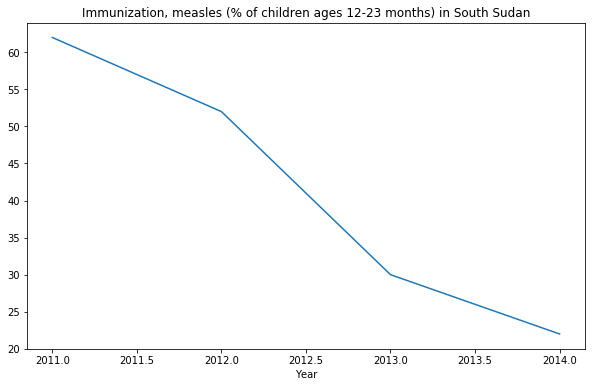

In [24]:
southsudan = res[(res['CountryName'] == "South Sudan") & (res['IndicatorName'] == 'Immunization, measles (% of children ages 12-23 months)')]
southsudan = southsudan[['Year', 'Value']]
southsudan.index = southsudan['Year']
# step 2: plot data
southsudan['Value'].plot(kind='line', figsize=(10, 6))

plt.xlabel('Year') # add to x-label to the plot

plt.title('Immunization, measles (% of children ages 12-23 months) in South Sudan') # add title to the plot

plt.show()

In [25]:
guinea = res[(res['CountryName'] == "Equatorial Guinea") & (res['IndicatorName'] == 'Immunization, measles (% of children ages 12-23 months)')]
guinea = guinea[['Year', 'Value']]
guinea.index = guinea['Year']
guinea

,Year,Value
Year,,
1985.0,1985.0,11.0
1986.0,1986.0,17.0
1987.0,1987.0,32.0
1988.0,1988.0,46.0
1989.0,1989.0,18.0
1990.0,1990.0,88.0
1991.0,1991.0,85.0
1992.0,1992.0,82.0
1993.0,1993.0,79.0


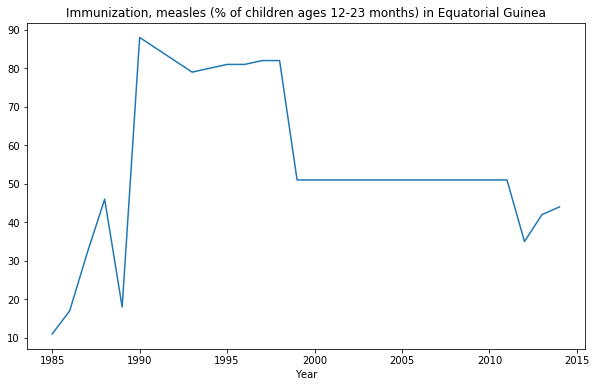

In [26]:
# step 2: plot data
guinea['Value'].plot(kind='line', figsize=(10, 6))

plt.xlabel('Year') # add to x-label to the plot

plt.title('Immunization, measles (% of children ages 12-23 months) in Equatorial Guinea') # add title to the plot

plt.show()

In [27]:
somalia = res[(res['CountryName'] == "Somalia") & (res['IndicatorName'] == 'Immunization, measles (% of children ages 12-23 months)')]
somalia = somalia[['Year', 'Value']]
somalia.index = somalia['Year']
somalia

,Year,Value
Year,,
1980.0,1980.0,9.0
1981.0,1981.0,3.0
1982.0,1982.0,4.0
1983.0,1983.0,6.0
1984.0,1984.0,16.0
1985.0,1985.0,35.0
1986.0,1986.0,25.0
1987.0,1987.0,28.0
1988.0,1988.0,33.0


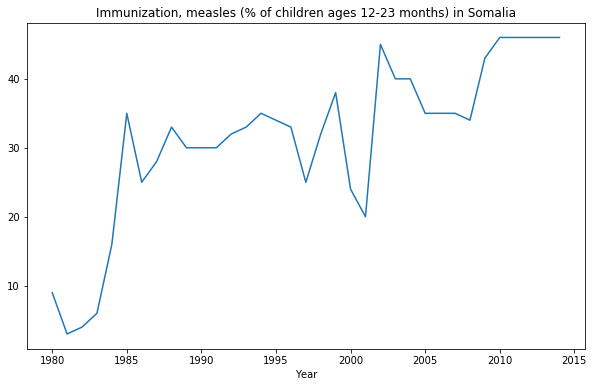

In [28]:
somalia['Value'].plot(kind='line', figsize=(10, 6))

plt.xlabel('Year') # add to x-label to the plot

plt.title('Immunization, measles (% of children ages 12-23 months) in Somalia') # add title to the plot

plt.show()

In [29]:
#Now let's visualize these three countries together for comparison

somalia = somalia.rename(columns={'Value': 'Somalia'})
southsudan = southsudan.rename(columns={'Value': 'South Sudan'})
guinea = guinea.rename(columns={'Value': 'Equatorial Guinea'})

In [30]:
from functools import reduce

dfs = [southsudan, guinea, somalia]
compare = reduce(lambda left,right: pd.merge(left,right,on='Year'), dfs)

In [31]:
compare

,Year,South Sudan,Equatorial Guinea,Somalia
0,2011.0,62.0,51.0,46.0
1,2012.0,52.0,35.0,46.0
2,2013.0,30.0,42.0,46.0
3,2014.0,22.0,44.0,46.0


In [32]:
compare.set_index(['Year'], inplace=True)
compare

,South Sudan,Equatorial Guinea,Somalia
Year,,,
2011.0,62.0,51.0,46.0
2012.0,52.0,35.0,46.0
2013.0,30.0,42.0,46.0
2014.0,22.0,44.0,46.0


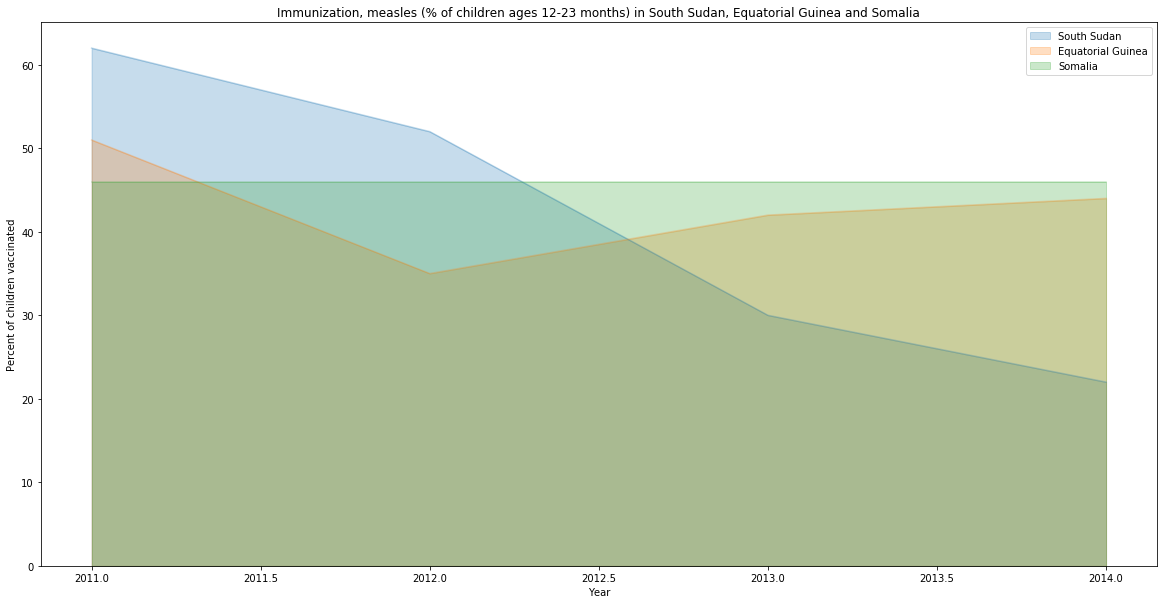

In [33]:
compare.plot(kind='area', 
             alpha=0.25, # 0-1, default value a= 0.5
             stacked=False,
             figsize=(20, 10),
            )

plt.title('Immunization, measles (% of children ages 12-23 months) in South Sudan, Equatorial Guinea and Somalia')
plt.ylabel('Percent of children vaccinated')
plt.xlabel('Year')

plt.show()

# Mortality Rates and Health Expenditure

As seen on Folium maps higher in this project, these countries also have high mortality rates. Let's see if we can find correlation between health expenditures and mortality rates. But to see a larger picture, let's focus on all African countries in the dataset.

In [34]:
indicator_name_health = 'Health expenditure, total \(% of GDP\)'
indicator_mask = res['IndicatorName'].str.contains(indicator_name_health)
healthexp = res[indicator_mask]
healthexp.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
17933,Algeria,DZA,"Health expenditure, total (% of GDP)",SH.XPD.TOTL.ZS,1995.0,3.701525
18696,Algeria,DZA,"Health expenditure, total (% of GDP)",SH.XPD.TOTL.ZS,1996.0,3.349070
19432,Algeria,DZA,"Health expenditure, total (% of GDP)",SH.XPD.TOTL.ZS,1997.0,3.594658
20173,Algeria,DZA,"Health expenditure, total (% of GDP)",SH.XPD.TOTL.ZS,1998.0,3.594082
20897,Algeria,DZA,"Health expenditure, total (% of GDP)",SH.XPD.TOTL.ZS,1999.0,3.433915


In [35]:
indicator_name_deathrate = 'Death rate, crude \(per 1,000 people\)'
i_death = res['IndicatorName'].str.contains(indicator_name_deathrate)
deathrate = res[i_death]
deathrate.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
18,Algeria,DZA,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,1960.0,20.341
206,Algeria,DZA,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,1961.0,19.952
410,Algeria,DZA,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,1962.0,19.557
598,Algeria,DZA,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,1963.0,19.158
785,Algeria,DZA,"Death rate, crude (per 1,000 people)",SP.DYN.CDRT.IN,1964.0,18.757


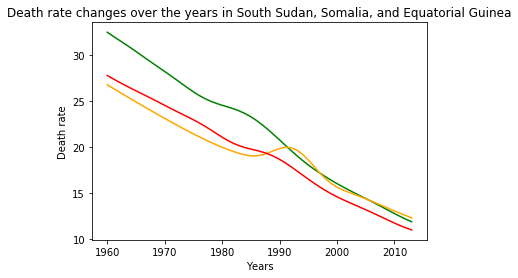

In [36]:
#Let's see how deathrates changed over the years in South Sudan, Somalia, and Equatorial Guinea
plt.plot(deathrate[deathrate['CountryName'] == 'South Sudan']['Year'], deathrate[deathrate['CountryName'] == 'South Sudan'].groupby('Year').sum(), color='g')
plt.plot(deathrate[deathrate['CountryName'] == 'Somalia']['Year'], deathrate[deathrate['CountryName'] == 'Somalia'].groupby('Year').sum(), color='orange')
plt.plot(deathrate[deathrate['CountryName'] == 'Equatorial Guinea']['Year'], deathrate[deathrate['CountryName'] == 'Equatorial Guinea'].groupby('Year').sum(), color='red')

plt.xlabel('Years')
plt.ylabel('Death rate')
plt.title('Death rate changes over the years in South Sudan, Somalia, and Equatorial Guinea')
plt.show()

Clearly we see a very visible progress. How about health expenditures?

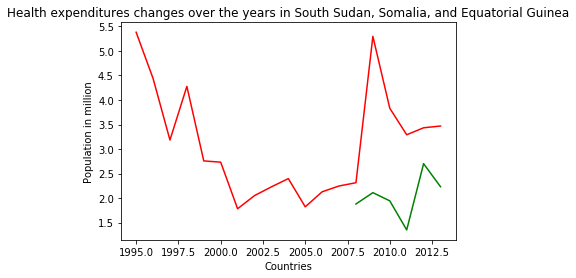

In [37]:
plt.plot(healthexp[healthexp['CountryName'] == 'South Sudan']['Year'], healthexp[healthexp['CountryName'] == 'South Sudan'].groupby('Year').sum(), color='g')
plt.plot(healthexp[healthexp['CountryName'] == 'Somalia']['Year'], healthexp[healthexp['CountryName'] == 'Somalia'].groupby('Year').sum(), color='orange')
plt.plot(healthexp[healthexp['CountryName'] == 'Equatorial Guinea']['Year'], healthexp[healthexp['CountryName'] == 'Equatorial Guinea'].groupby('Year').sum(), color='red')

plt.xlabel('Countries')
plt.ylabel('Population in million')
plt.title('Health expenditures changes over the years in South Sudan, Somalia, and Equatorial Guinea')
plt.show()

Ok, as we can see the data on health expenditures are insufficient to draw conclusions. However, I would refer readers to an interesting analysis by Samuel Markus Joseph on Kaggle: Impact of health expenditure to mortality rate: https://www.kaggle.com/samuelmjoseph/impact-of-health-expenditure-to-mortality-rate. I will not replicate his results, but please check his conclusions.

# Which countries are the poorest?

Moral philosopher Peter Singer started his TED talk, “A Ripple Effect?” with a shocking video of a 2-year-old girl in China who was hit by a van — and then a second van — and ignored by passers-by as she lay dying in an alley. He asks of the audience: Would you have stopped and helped this girl? Not surprisingly, the unanimous response was yes. Well, every day that we don’t help others, he says, it’s like leaving this girl crippled in the alley. In 2012, Singer says, UNICEF reported that 6.9 million children under 5 died from preventable poverty-relatable diseases like malaria. Does it really matter that we’re not walking past these children in the street, that they’re far away? According to Singer, there is no morally relevant difference.

So let's now analyze our global dataset to single out 20 poorest countries.

Text(0.5,1,'The 20 Countries with Lowest Average Income in 2014')

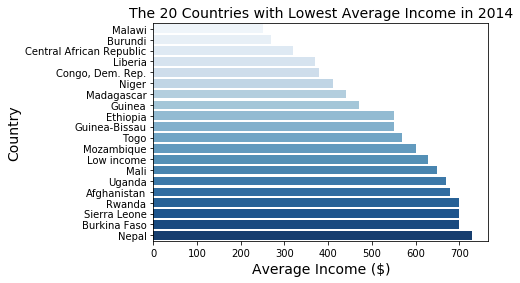

In [59]:
import seaborn as sns

lowestGNIin2014 = data.query("IndicatorCode == 'NY.GNP.PCAP.CD' & CountryName != list & Year == 2014").sort_values(by = 'Value', ascending = True)[:20]

fig = plt.subplots()

graph = sns.barplot(x = "Value", y = "CountryName", palette = "Blues", data = lowestGNIin2014)
plt.xlabel('Average Income ($)', fontsize = 14)
plt.ylabel('Country',  fontsize=14)
plt.title('The 20 Countries with Lowest Average Income in 2014', fontsize = 14)

As we see from the dataset, these 20 countries clearly require more support from EA community. 

# High Impact Jobs: Battle of Cities

80,000 Hours is one of the best websites for anyone interested in Effective Altruism. They have their own job board. This board contains a short, curated list of the most promising publicly advertized vacancies they know about right now. They’re all high-impact opportunities at organisations that are working on some of the world’s most pressing problems. 

Given that our capstone has to adhere to a theme of a battle of neighborhoods, I thought, why not scrape all the job locations they currently have and see which location might be a good bet for a person looking for a high impact career, which, given the right motivation, can allow an applicant to contribute to resolving some of the world's biggest challenges, for instance through invididual donations to causes like immunization programs where they are needed the most (as we discussed above).

In [39]:
from time import sleep
from selenium import webdriver

driver = webdriver.Firefox(executable_path=r"geckodriver.exe")
driver.get('https://80000hours.org/job-board/')

from selenium.common.exceptions import NoSuchElementException        
def check_exists(id):
    try:
        driver.find_element_by_id(id)
    except NoSuchElementException:
        return False
    return True

joblocations = []

goloop = True
while goloop:
    try:    
        btn = driver.find_element_by_id("show-more")
        btn.click()
    except:
        goloop = False
        
try:
    jobsection = driver.find_elements_by_class_name("panel-vacancy__location")
    for job in jobsection:    
        print(job.text)
        joblocations.append(job.text)
except:
    print('End of the job list')
    
driver.quit()

import pickle

with open('outfile', 'wb') as fp:
    pickle.dump(joblocations, fp)

Oxford, UK
Various cities
London, UK / Remote
Beijing, China / Washington, DC
San Francisco Bay Area / Remote
Washington, DC
Washington, DC
Washington, DC
San Francisco Bay Area
London, UK
London, UK
London, UK
Cambridge, UK
San Francisco Bay Area
San Francisco Bay Area
San Francisco Bay Area
Los Angeles, CA
El Segundo, CA
El Segundo, CA
London, UK
Oyo State, Nigeria
Washington, DC / Nairobi, Kenya
Delhi, India
Remote
Remote
Redwood City, CA
Redwood City, CA
Redwood City, CA
New York, NY / New Haven, CT
New York, NY
New York, NY / Washington, DC
San Francisco Bay Area
San Francisco Bay Area
San Francisco Bay Area
Los Angeles, CA / Remote
Remote
Remote
Remote
San Francisco Bay Area
Washington, DC / New York, NY
Washington, DC / New York, NY
Washington, DC
Los Angeles, CA
El Segundo, CA
El Segundo, CA
Washington, DC
Remote
Remote
Nairobi, Kenya
San Francisco Bay Area
San Francisco Bay Area
San Francisco Bay Area
Los Angeles, CA / Remote
Remote
Washington, DC
Cambridge, UK
Washington, DC


First, let's remove 'remote' jobs from our list and clean the list

In [40]:
import pickle
with open ('outfile', 'rb') as fp:
    joblocations = pickle.load(fp)
cleanedjobs = []
    
for i in joblocations:
    cleanedjobs.extend(i.split('/'))
cleanedjobs = [x for x in cleanedjobs if "Remote" not in x]
cleanedjobs = [x for x in cleanedjobs if "Various cities" not in x]
cleanedjobs = [x for x in cleanedjobs if "Various Countries" not in x]
cleanedjobs    
print(cleanedjobs)

['Oxford, UK', 'London, UK ', 'Beijing, China ', ' Washington, DC', 'San Francisco Bay Area ', 'Washington, DC', 'Washington, DC', 'Washington, DC', 'San Francisco Bay Area', 'London, UK', 'London, UK', 'London, UK', 'Cambridge, UK', 'San Francisco Bay Area', 'San Francisco Bay Area', 'San Francisco Bay Area', 'Los Angeles, CA', 'El Segundo, CA', 'El Segundo, CA', 'London, UK', 'Oyo State, Nigeria', 'Washington, DC ', ' Nairobi, Kenya', 'Delhi, India', 'Redwood City, CA', 'Redwood City, CA', 'Redwood City, CA', 'New York, NY ', ' New Haven, CT', 'New York, NY', 'New York, NY ', ' Washington, DC', 'San Francisco Bay Area', 'San Francisco Bay Area', 'San Francisco Bay Area', 'Los Angeles, CA ', 'San Francisco Bay Area', 'Washington, DC ', ' New York, NY', 'Washington, DC ', ' New York, NY', 'Washington, DC', 'Los Angeles, CA', 'El Segundo, CA', 'El Segundo, CA', 'Washington, DC', 'Nairobi, Kenya', 'San Francisco Bay Area', 'San Francisco Bay Area', 'San Francisco Bay Area', 'Los Angeles,

In [41]:
from geopy.geocoders import Nominatim

dictionary_of_addresses = {}

for i in range(len(cleanedjobs)):
    
    address = cleanedjobs[i]
    geolocator = Nominatim()
    location = geolocator.geocode(address, timeout=10)
    latitude = location.latitude
    longitude = location.longitude
    print('The geograpical coordinate of {} are {}, {}.'.format(address, latitude, longitude))
    dictionary_of_addresses[i] = [address, latitude, longitude]
print(dictionary_of_addresses)

C:\Users\User\Anaconda3\envs\tensorflow\lib\site-packages\geopy\geocoders\osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


The geograpical coordinate of Oxford, UK are 51.7520131, -1.2578499.
The geograpical coordinate of London, UK  are 51.5073219, -0.1276474.
The geograpical coordinate of Beijing, China  are 39.9059631, 116.391248.
The geograpical coordinate of  Washington, DC are 38.8950092, -77.0365625.
The geograpical coordinate of San Francisco Bay Area  are 37.7884969, -122.3558473.
The geograpical coordinate of Washington, DC are 38.8950092, -77.0365625.
The geograpical coordinate of Washington, DC are 38.8950092, -77.0365625.
The geograpical coordinate of Washington, DC are 38.8950092, -77.0365625.
The geograpical coordinate of San Francisco Bay Area are 37.7884969, -122.3558473.
The geograpical coordinate of London, UK are 51.5073219, -0.1276474.
The geograpical coordinate of London, UK are 51.5073219, -0.1276474.
The geograpical coordinate of London, UK are 51.5073219, -0.1276474.
The geograpical coordinate of Cambridge, UK are 52.2034823, 0.1235817.
The geograpical coordinate of San Francisco B

The geograpical coordinate of San Francisco Bay Area are 37.7884969, -122.3558473.
The geograpical coordinate of London, UK are 51.5073219, -0.1276474.
The geograpical coordinate of London, UK  are 51.5073219, -0.1276474.
The geograpical coordinate of  Quebec, Canada are 52.4760892, -71.8258668.
The geograpical coordinate of Oxford, UK  are 51.7520131, -1.2578499.
The geograpical coordinate of Oxford, UK  are 51.7520131, -1.2578499.
The geograpical coordinate of San Francisco Bay Area are 37.7884969, -122.3558473.
The geograpical coordinate of Oxford, UK are 51.7520131, -1.2578499.
The geograpical coordinate of San Francisco Bay Area are 37.7884969, -122.3558473.
The geograpical coordinate of San Francisco Bay Area are 37.7884969, -122.3558473.
The geograpical coordinate of San Francisco Bay Area are 37.7884969, -122.3558473.
The geograpical coordinate of Washington, DC are 38.8950092, -77.0365625.
The geograpical coordinate of San Francisco Bay Area are 37.7884969, -122.3558473.
The g

In [42]:
high_impact_job_locations = pd.DataFrame.from_dict(dictionary_of_addresses)

In [43]:
#Which cities have the biggest number of high impact jobs (according to 80,000 Hours job board).

high_impact_job_locations_T = high_impact_job_locations.transpose()
high_impact_job_locations_T[0].unique()

high_impact_job_locations_T[0].value_counts().head(10)

San Francisco Bay Area     45
Washington, DC             15
London, UK                  9
San Francisco Bay Area      7
Oxford, UK                  6
New York, NY                4
 Washington, DC             4
El Segundo, CA              4
Washington, DC              4
New York, NY                3
Name: 0, dtype: int64

Now let's visualize these locations on the Folium map.

In [44]:
import folium.plugins
m = folium.Map(location=[0, 0], zoom_start=2)
cluster = folium.plugins.MarkerCluster().add_to(m)
for lat, lng, city in zip(high_impact_job_locations_T[1], high_impact_job_locations_T[2], high_impact_job_locations_T[0]):
    folium.Marker(location=[lat, lng], popup=str(city)).add_to(cluster)

folium.LayerControl(collapsed=False).add_to(m)
m.save('map.html')
m

Ok, in our city battle, we seem to have a winner. This is San Francisco and Silicon Valley. In our final analysis, let's use Foursquare API to check which venues are available in San Francisco city center and which ones are trending.

In [45]:
CLIENT_ID = 'MYQ3QLZXFN1OXIR5SFF4FIY1FWDTBWVUXYCVF15OS3RNGRAD' # your Foursquare ID
CLIENT_SECRET = 'UQ1HICEZTBTBTDVR3ZFFHFFFMKICIM4DEXENDCB3VKNAVHXR' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: MYQ3QLZXFN1OXIR5SFF4FIY1FWDTBWVUXYCVF15OS3RNGRAD
CLIENT_SECRET:UQ1HICEZTBTBTDVR3ZFFHFFFMKICIM4DEXENDCB3VKNAVHXR


In [46]:
# type your answer here
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
lat = 37.7766278; lng = -122.4235738
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    lat, 
    lng, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=MYQ3QLZXFN1OXIR5SFF4FIY1FWDTBWVUXYCVF15OS3RNGRAD&client_secret=UQ1HICEZTBTBTDVR3ZFFHFFFMKICIM4DEXENDCB3VKNAVHXR&v=20180605&ll=37.7766278,-122.4235738&radius=500&limit=100'

In [47]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5bced4801ed2194285b8d0dc'},
 'response': {'groups': [{'items': [{'reasons': {'count': 0,
       'items': [{'reasonName': 'globalInteractionReason',
         'summary': 'This spot is popular',
         'type': 'general'}]},
      'referralId': 'e-0-50f21340e4b036c5cc0d7c7d-0',
      'venue': {'categories': [{'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/musicvenue_jazzclub_',
          'suffix': '.png'},
         'id': '4bf58dd8d48988d1e7931735',
         'name': 'Jazz Club',
         'pluralName': 'Jazz Clubs',
         'primary': True,
         'shortName': 'Jazz Club'}],
       'id': '50f21340e4b036c5cc0d7c7d',
       'location': {'address': '201 Franklin St',
        'cc': 'US',
        'city': 'San Francisco',
        'country': 'United States',
        'crossStreet': 'at Fell St',
        'distance': 181,
        'formattedAddress': ['201 Franklin St (at Fell St)',
         'San Francisco, CA 94102',
         'Un

In [48]:
# type your answer here
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
lat = 37.7766278; lng = -122.4235738
url = 'https://api.foursquare.com/v2/venues/trending?client_id={}&client_secret={}&ll={},{}&v={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION)
url # display URL

'https://api.foursquare.com/v2/venues/trending?client_id=MYQ3QLZXFN1OXIR5SFF4FIY1FWDTBWVUXYCVF15OS3RNGRAD&client_secret=UQ1HICEZTBTBTDVR3ZFFHFFFMKICIM4DEXENDCB3VKNAVHXR&ll=38.8950092,-77.0365625&v=20180605'

In [60]:
trending = requests.get(url).json()
trending

{'meta': {'code': 200, 'requestId': '5bcf1b434434b9406d4482dc'},
 'response': {'venues': []}}

Effective altruism helps the world by causing individuals to do more good in their lives. Data science is an indispensable set of skills which can help an effective altruism to succeed in her or his mission. This capstone project is just the beginning of this analysis. I hope it helps and motivates someone to explore further.